# Project 2 : Loan Risk Analysis

# Introduction

Your task is to prepare reports for the credit division of a bank. You will find out the effect of a customer's marital status and the number of children he has on the probability of defaulting on loan repayment. The bank already has some data regarding customer credit worthiness.

Your report will be considered when making a **credit assessment** for potential customers. **credit scoring** is used to evaluate a potential borrower's ability to repay their loan.

# Goal

The aim of this project is to find out the effect of a customer's marital status and the number of children they have on the probability of default in repayment of credit bills by proving the following hypothesis:
1. Loan failure occurs in customers who are married and have more than one child.
2. Customers with *single* status regularly pay loans.
3. Customers with incomes greater than average regularly pay loans.
4. The purpose of the loan is a factor in loan failure.

## Open the data *file* and read the general information.

To test the hypothesis that is the aim of this project, what is done first is to import the *pandas library* to help process customer data.

Next, directly open the customer data in the form of the `credit_scoring_eng.csv` file. To resolve errors, you can call the customer data taken from *filepath* `/datasets/credit_scoring_eng.csv` and save it in the df variable.

In [203]:
# mengimport pandas library
import pandas as pd

In [204]:
# membuka berkas data nasabah berdasarkan file path data bersangkutan dan menyimpannya ke variabel df
# menggunakan metode try except untuk mengatasi error file path pertama untuk dilanjutkan ke opsi file path kedua

try :
    df = pd.read_csv('credit_scoring_eng.csv') 
except:
    df= pd.read_csv('/datasets/credit_scoring_eng.csv')

## 1. Data Exploration

**Data Description**
- `children` - number of children in the family
- `days_employed` - customer work experience in days
- `dob_years` - customer age in years
- `education` - customer education level
- `education_id` - identifier for the customer's education level
- `family_status` - identifier for the customer's marital status
- `family_status_id` - marital status identifier
- `gender` - customer gender
- `income_type` - job type
- `debt` - whether the customer has ever defaulted on a loan
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

After getting the df variable, then see the display of the data frame in the df variable.

In [4]:
df.describe() # menampilkan informasi umum dari data frame yang tersedia pada variabel df

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [5]:
df.head(10) # # memperoleh 10 baris pertama dari data frame df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Based on the information from the example table displayed, at a glance, it can be seen that:
1. Inconsistent characters or data formats as seen in the columns, namely the `education`, `children`, and `days_employed` columns.
2. There are allegations of duplicated and missing data in the data frame.
So it is necessary to dig up further information regarding the data frame in the df variable.

In [6]:
df.info()# Dapatkan informasi data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Based on general information, several interesting things can be found:
1. Each column has a different data type: `integer`, `object/string`, and `float`.
2. The number of values is different in several columns, so it can be confirmed that there is missing data in the `days_employed` and `total_income` columns.

In [7]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang

df.isnull().sum() # menampilkan jumlah nilai yang hilang pada setap kolom dalam data frame


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

From the information about the number of missing values in each column, an interesting thing was found where the number of missing values in the `days_employed` column and the `total__income` column was the same, namely `2174`.
Because the number of missing values in both columns is the same, *filtering* will be carried out to ensure that the missing data in the `days_employed` column and the `total__income` column are found in each row in the same way (symmetrically) with the following filtering:

In [8]:
 # Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
print(df[(df['days_employed'].isna()) & (df['total_income'].isna())]['children'].count())#melakukan filtering terhadap kolom days_employed dan kolom total_income yang berisi nilai yang hilang dan menjumlahkan total baris tersebut

total_null_rows = df[(df['days_employed'].isna()) & (df['total_income'].isna())]['children'].count() # jumlah baris dengan nilai yang hilang
total_rows = 21525 # jumlah baris dalam data frame
percentage_null = total_null_rows / total_rows # bagi jumlah baris berisi nilai yang hilang dengan total baris
print(f'Persentase nilai yang hilang: {percentage_null:.0%}') # menampilkan persentase nilai yang hilang

2174
Persentase nilai yang hilang: 10%


**Conclusions**

The numbers obtained from filtering the `days_employed` and `total_income` columns show the same value, namely `2174` rows which have missing columns, so that a temporary conclusion can be drawn where the missing data in the `days_employed` and `total_income` columns is found in each row the same or in other words symmetrical.

The portion of missing values in the data frame is quite large, namely `10%`, so it is necessary to extract further information in the data frame to find out whether there are special characteristics for each customer. Based on the general information in the data frame table displayed, it is possible that there are data characteristics in the `income_type` column where the type of income is the cause of symmetric missing data.

To analyze it, we will check what objects or types of income are in the `income_type` column and how many customers there are with the income type in question so that we can find out whether there is a correlation between the amount of missing data and the number of customers with a certain type of income.

In [9]:
#Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
df['income_type'].unique() #menampilkan nilai yang unik pada kolom income_type

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [10]:
# Periksalah distribusinya
df.groupby('income_type')['children'].count()# mengelompokan data pada kolom income_type dan menampilkan jumlahnya

income_type
business                        5085
civil servant                   1459
employee                       11119
entrepreneur                       2
paternity / maternity leave        1
retiree                         3856
student                            1
unemployed                         2
Name: children, dtype: int64

There are several types of customer income, where the 'employee' income type is the largest. Customers with the income type `retire` are also quite large, where the value is greater than the missing data in the `days_employed` and `total_income` columns.

**Possible causes of missing values in data**

There is a possibility that the missing data is caused by the type of income, but to be sure, missing data will be checked for each type of income.

In [35]:
# Memeriksa distribusi di seluruh *dataset*
df.groupby('income_type').count() # mengelompokan data pada kolom income_type dan menampilkan distribusinya pada setiap kolom pada data frame untuk melihat sebaran data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt,total_income,purpose
income_type,,,,,,,,,,,
business,5085,4577,5085,5085,5085,5085,5085,5085,5085,4577,5085
civil servant,1459,1312,1459,1459,1459,1459,1459,1459,1459,1312,1459
employee,11119,10014,11119,11119,11119,11119,11119,11119,11119,10014,11119
entrepreneur,2,1,2,2,2,2,2,2,2,1,2
paternity / maternity leave,1,1,1,1,1,1,1,1,1,1,1
retiree,3856,3443,3856,3856,3856,3856,3856,3856,3856,3443,3856
student,1,1,1,1,1,1,1,1,1,1,1
unemployed,2,2,2,2,2,2,2,2,2,2,2


In [36]:
# melihat jumlah nilai yang hilang dari setiap parameter pada kolom income_type
a = df[['income_type', 'total_income']].groupby('income_type').count() # melakukan grouping tipe pendapatan terhadap kolom total_income
b = df[['income_type', 'total_income']].fillna(-1).groupby('income_type').count() # menghitung semua data tipe pendapatan terhadap kolom income type
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang pada setiap tipe pendapatan
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase data yang hilang 
c   

,null,not_null,total,percent_null
income_type,,,,
business,508,4577,5085,9.990167
civil servant,147,1312,1459,10.075394
employee,1105,10014,11119,9.937944
entrepreneur,1,1,2,50.000000
paternity / maternity leave,0,1,1,0.000000
retiree,413,3443,3856,10.710581
student,0,1,1,0.000000
unemployed,0,2,2,0.000000


**Conclusions**

From the distribution of the amount of missing data in the `income_type` column, it is known that almost all types of income have missing data in the `total_income` column with the largest percentage being in the `entrepreneur` income type, but the amount is not significant. By number, the `employee` type contributed the largest amount of missing data.

Based on this data, it is known that the missing data occurs randomly for income types, but it is necessary to investigate the data frame further to look for other patterns of missing data so that the conclusions drawn are closer to the actual situation.

Next, we will investigate the distribution of missing data in the `education` column.

In [37]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
df.groupby('education').count() # mengelompokan data pada kolom education dan menampilkan distribusinya pada setiap kolom pada data frame untuk melihat sebaran data

,children,days_employed,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
education,,,,,,,,,,,
BACHELOR'S DEGREE,274,251,274,274,274,274,274,274,274,251,274
Bachelor's Degree,268,243,268,268,268,268,268,268,268,243,268
GRADUATE DEGREE,1,1,1,1,1,1,1,1,1,1,1
Graduate Degree,1,1,1,1,1,1,1,1,1,1,1
PRIMARY EDUCATION,17,16,17,17,17,17,17,17,17,16,17
Primary Education,15,14,15,15,15,15,15,15,15,14,15
SECONDARY EDUCATION,772,705,772,772,772,772,772,772,772,705,772
SOME COLLEGE,29,22,29,29,29,29,29,29,29,22,29
Secondary Education,711,646,711,711,711,711,711,711,711,646,711


In [13]:
# melihat jumlah nilai yang hilang dari setiap parameter pada kolom education
a = df[['education', 'total_income']].groupby('education').count() # melakukan grouping latar belakang pendidikan terhadap kolom total_income
b = df[['education', 'total_income']].fillna(-1).groupby('education').count() # menghitung semua data latar belakang pendidikan terhadap kolom income type
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang pada setiap tipe pendapatan
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase data yang hilang 
c   

,null,not_null,total,percent_null
education,,,,
BACHELOR'S DEGREE,23,251,274,8.394161
Bachelor's Degree,25,243,268,9.328358
GRADUATE DEGREE,0,1,1,0.000000
Graduate Degree,0,1,1,0.000000
PRIMARY EDUCATION,1,16,17,5.882353
Primary Education,1,14,15,6.666667
SECONDARY EDUCATION,67,705,772,8.678756
SOME COLLEGE,7,22,29,24.137931
Secondary Education,65,646,711,9.142053


**Conclusions**

From the data in the `education` column, you can see several duplications in different formats, but for now this will be put aside because the missing data is found in all objects in the `education` column with the largest percentage being in `some college` but with the same number. not significant. Based on the numbers, educational background `secondary education` contributed the largest missing data.

Based on this data, it is known that missing data occurs randomly for educational background. We will once again investigate the distribution of missing data in the `family_status` column.

In [14]:
# Periksa pola lainnya - jelaskan pola tersebut
df.groupby('family_status').count() # mengelompokan data pada kolom family_status dan menampilkan distribusinya pada setiap kolom pada data frame untuk melihat sebaran data

,children,days_employed,dob_years,education,education_id,family_status_id,gender,income_type,debt,total_income,purpose
family_status,,,,,,,,,,,
civil partnership,4177,3735,4177,4177,4177,4177,4177,4177,4177,3735,4177
divorced,1195,1083,1195,1195,1195,1195,1195,1195,1195,1083,1195
married,12380,11143,12380,12380,12380,12380,12380,12380,12380,11143,12380
unmarried,2813,2525,2813,2813,2813,2813,2813,2813,2813,2525,2813
widow / widower,960,865,960,960,960,960,960,960,960,865,960


In [15]:
# melihat jumlah nilai yang hilang dari setiap parameter pada kolom family_status
a = df[['family_status', 'total_income']].groupby('family_status').count() # melakukan grouping family_status terhadap kolom total_income
b = df[['family_status', 'total_income']].fillna(-1).groupby('family_status').count() # menghitung semua data family_status terhadap kolom income type
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang pada setiap tipe pendapatan
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase data yang hilang 
c   

,null,not_null,total,percent_null
family_status,,,,
civil partnership,442,3735,4177,10.581757
divorced,112,1083,1195,9.372385
married,1237,11143,12380,9.991922
unmarried,288,2525,2813,10.238180
widow / widower,95,865,960,9.895833


**Conclusion**

From the data in the `family_status` column, missing data is found in all objects in the `family_status` column, with the largest percentage in `civil partnership` and `unmarried`, but the amount is not significant. By number, `married` contributed the largest amount of missing data.

Based on the investigations above, it can be concluded that the missing data occurred randomly and did not form a particular pattern or relationship with the data between columns.

Because the missing data is not patterned and there is no connection between the columns, it will be removed from the data frame, but before execution is carried out, it is necessary to check again to ensure that there are no other problems that occur in the data frame, such as implicit and explicit duplication, different formats, or the wrong data source.

## Data Transformation

The next thing to do is check the data format and duplication in each column.

The first column to check is `education` because based on the missing data investigation, this column has many spelling and duplication issues. Next, spelling corrections and duplication removals will be carried out.

In [206]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
df['education'].unique() #menampilkan nilai yang unik pada kolom education

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [207]:
# fungsi untuk mengganti duplikat implisit dimana key berisi nama lama dan value berisi nama baru
def replace_wrong_education(wrong_education, correct_education): 
    for wrong_education in wrong_education: 
        df['education'] = df['education'].replace(wrong_education, correct_education)

# daftar education yang salah pengejaan
duplicates_1 = ["Bachelor's Degree", "BACHELOR'S DEGREE"] 
duplicates_2 = ['Secondary Education', 'SECONDARY EDUCATION']
duplicates_3 = ['SOME COLLEGE', 'Some College']
duplicates_4 = ['PRIMARY EDUCATION', 'Primary Education']
duplicates_5 = ['GRADUATE DEGREE', 'Graduate Degree']

# nama yang benar
name_1 = "bachelor's degree" 
name_2 = 'secondary education'
name_3 = 'some college'
name_4 = 'primary education'
name_5 = 'graduate degree'

# memanggil fungsi replace untuk setiap nama yang salah 
replace_wrong_education(duplicates_1, name_1)
replace_wrong_education(duplicates_2, name_2)
replace_wrong_education(duplicates_3, name_3)
replace_wrong_education(duplicates_4, name_4)
replace_wrong_education(duplicates_5, name_5)

In [196]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Selanjutnya aka dilakukan pemerksaan terhadap kolom `children`.

In [208]:
# Mari kita lihat distribusi nilai pada kolom `children`
df['children'].unique() #menampilkan nilai yang unik pada kolom education

array([ 1,  0,  3,  2, -1,  4, 20,  5])

There is a strange thing in this column where the number of children is between `-1` and '20', which doesn't seem to make sense and is likely due to spelling or errors when inputting the data. Each data object will be checked in the `children` column.

In [209]:
# [perbaiki data berdasarkan keputusan Anda]
df.groupby('children').count() # melakukan pengelompokan data berdasarkan kolom children

,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
children,,,,,,,,,,,
-1,44,47,47,47,47,47,47,47,47,44,47
0,12710,14149,14149,14149,14149,14149,14149,14149,14149,12710,14149
1,4343,4818,4818,4818,4818,4818,4818,4818,4818,4343,4818
2,1851,2055,2055,2055,2055,2055,2055,2055,2055,1851,2055
3,294,330,330,330,330,330,330,330,330,294,330
4,34,41,41,41,41,41,41,41,41,34,41
5,8,9,9,9,9,9,9,9,9,8,9
20,67,76,76,76,76,76,76,76,76,67,76


Based on data grouping, the data on the number of children `-1` and `20` has quite a lot of value but is not significant, so this data will be replaced with data `1` and `2`.

In [210]:
# fungsi untuk mengganti duplikat implisit dimana key berisi nama lama dan value berisi nama baru
def replace_wrong_children(wrong_children, correct_children): 
    df['children'] = df['children'].replace(wrong_children, correct_children)

# daftar children yang salah pengejaan
duplicates_1 = -1
duplicates_2 = 20

# nama yang benar
name_1 = 1
name_2 = 2

# memanggil fungsi replace untuk setiap nama yang salah 
replace_wrong_children(duplicates_1, name_1)
replace_wrong_children(duplicates_2, name_2)

In [211]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

Next, a check will be carried out on the `days employed` column.

In [45]:
df['days_employed'].describe()# Temukan data yang bermasalah di kolom `days_employed` jika memang terdapat masalah, dan hitung persentasenya

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [46]:
df.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Based on the data displayed above, a problem was found. It turns out that the data type in the `days_employed` column is `float`. It is possible that the float data occurred because the input data was calculated in units of hours, so it needed to be converted into days in `integer` form. However, this action will be carried out after there has been treatment of the missing data in this column.
The second problem that is visible is that there are quite a lot of `negative` values in this column. It is possible that there is a pattern occurring that is related to other columns. Therefore, we will investigate the relationship between the `days_employed` column and the `income_type` column.

In [47]:
df1 = df[df['days_employed'] <= 0] # mengambil data negatif pada kolom days_employed
df2 = df[df['days_employed'] > 0] # mengambil data positif pada kolom days_employed

In [48]:
df1['income_type'].value_counts() # menampilkan sebaran data negatif days_employed pada kolom income_type

employee                       10014
business                        4577
civil servant                   1312
paternity / maternity leave        1
student                            1
entrepreneur                       1
Name: income_type, dtype: int64

In [49]:
df2['income_type'].value_counts() # menampilkan sebaran data positif days_employed pada kolom income_type

retiree       3443
unemployed       2
Name: income_type, dtype: int64

Minus data in the `days_employed` column occurs only for customers who are actively working, while positive data in the `days_employed` column occurs for customers who are not actively working. It can be concluded that for the `days_employed` column, the distribution of `minus` and `positive` data has a certain pattern.

In [50]:
df_null = df[df['days_employed'].isna()]

In [51]:
df_null.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65.0,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41.0,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63.0,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50.0,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54.0,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [52]:
df_null['income_type'].value_counts()

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

It is known that missing data values also occur in the income group of active workers whose `days_employed` is negative and the income group of inactive workers (retirees). This information will later be useful when replacing missing values.

Next, an examination of the `dog years` column will be carried out.

In [53]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
df['dob_years'].unique()
df.groupby('dob_years')['children'].count()

dob_years
19.0     14
20.0     51
21.0    111
22.0    183
23.0    254
24.0    264
25.0    357
26.0    408
27.0    493
28.0    503
29.0    545
30.0    540
31.0    560
32.0    510
33.0    581
34.0    603
35.0    617
36.0    555
37.0    537
38.0    598
39.0    573
40.0    609
41.0    607
42.0    698
43.0    513
44.0    547
45.0    497
46.0    475
47.0    480
48.0    538
49.0    508
50.0    514
51.0    448
52.0    484
53.0    459
54.0    479
55.0    443
56.0    487
57.0    460
58.0    461
59.0    444
60.0    377
61.0    355
62.0    352
63.0    269
64.0    265
65.0    194
66.0    183
67.0    167
68.0     99
69.0     85
70.0     65
71.0     58
72.0     33
73.0      8
74.0      6
75.0      1
Name: children, dtype: int64

In [212]:
percentage_0_dob_years = 101/21525
print(f'Persentase nilai 0: {percentage_0_dob_years:.2%}')

Persentase nilai 0: 0.47%


There is an age number `0` in the `dob_years` column of `0.47%` which is an error because it is impossible for the customer's age to be 0 years. This problematic value will be replaced with the median customer age. The median is chosen over the mean because there are several customers over 65 years old, but the number is not significant.

The average and median age of all customers will be calculated.

In [213]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah

dob_years_median = df['dob_years'].median() #mencari nilai median usia nasabah

df['dob_years'] = df['dob_years'].replace(0, dob_years_median) # mengganti 0 dengan median


In [214]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['dob_years'].value_counts()


42.0    698
35.0    617
40.0    609
41.0    607
34.0    603
38.0    598
33.0    581
39.0    573
31.0    560
36.0    555
44.0    547
29.0    545
30.0    540
48.0    538
37.0    537
50.0    514
43.0    513
32.0    510
49.0    508
28.0    503
45.0    497
27.0    493
56.0    487
52.0    484
47.0    480
54.0    479
46.0    475
58.0    461
57.0    460
53.0    459
51.0    448
59.0    444
55.0    443
26.0    408
60.0    377
25.0    357
61.0    355
62.0    352
63.0    269
64.0    265
24.0    264
23.0    254
65.0    194
66.0    183
22.0    183
67.0    167
21.0    111
68.0     99
69.0     85
70.0     65
71.0     58
20.0     51
72.0     33
19.0     14
73.0      8
74.0      6
75.0      1
Name: dob_years, dtype: int64

Next, a check will be carried out on the `family status` column.

In [215]:
# Mari kita lihat nilai untuk kolom ini
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

No problems were found with the `family status` column. Next, a check will be carried out on the `gender` column.

In [216]:
# Mari kita liat nilai dalam kolom ini
print(df['gender'].unique())
df.groupby('gender')['children'].count()

['F' 'M' 'XNA']


gender
F      14236
M       7288
XNA        1
Name: children, dtype: int64

The number of problematic values where the `XNA` gender data is small enough is 1, so the data will be changed to genre F based on the larger F gender number value.

In [217]:
# Atasi nilai-nilai yang bermasalah, jika ada
# mengganti denger XNA dengan F
df['gender'] = df['gender'].replace('XNA', 'F')

In [201]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['gender'].unique()

array(['F', 'M'], dtype=object)

Next, an examination of the `income_type` column will be carried out.

In [218]:
# Mari kita lihat nilai dalam kolom ini
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

No problems were found in the `income_type` column. Next, an examination of the `total_income` column will be carried out.

In [138]:
df['total_income'].describe() # melihat nilai statistik pada kolom total_income

count     21453.000000
mean      29131.519529
std       19642.830973
min          -1.000000
25%       17001.977000
50%       24067.224000
75%       34330.531000
max      362496.645000
Name: total_income, dtype: float64

From the data display above, it is known that there is a negative income value. This makes little sense. We will check again how many negative values there are in the `total_income` column.

In [ ]:
df_minus = df[df['total_income'] < 0] # mengambil nilai negatif pada kolom total_income

In [142]:
df_minus['total_income'].value_counts() # menampilkan jumlah nilai negatif

-1.0    145
Name: total_income, dtype: int64

The number of negative values is quite small, namely `145`. Because the number is small, we will replace it with the median value of `total_income`.

In [143]:
total_income_median = df['total_income'].median() # menghitung nilai median dari kolom total_income dan menyimpannya pada variabel baru

In [144]:
df['total_income'] = df['total_income'].replace(-1, total_income_median) # mengganti nilai negatif dengan median

/tmp/ipykernel_27/2388854788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_income'] = df['total_income'].replace(-1, total_income_median)


In [146]:
df['total_income'].describe() # melihat nilai statistik pada kolom total_income baru

count     21453.000000
mean      29294.195727
std       19500.027607
min        3306.762000
25%       17219.352000
50%       24067.224000
75%       34330.531000
max      362496.645000
Name: total_income, dtype: float64

The negative values in the `total_income` column have been removed, so we will proceed to the duplicate removal stage.

# Duplicate Removal

Next, an investigation will be carried out to see whether there is duplicate data in the data frame.

In [219]:
# Periksa duplikat
print(df.duplicated().sum())

72


In [220]:
# Atasi duplikat, jika ada
df = df.drop_duplicates()

In [221]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
print(df.duplicated().sum())

0


In [65]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21453 non-null  int64  
 1   children          21453 non-null  int64  
 2   days_employed     19351 non-null  float64
 3   dob_years         21453 non-null  float64
 4   education         21453 non-null  object 
 5   education_id      21453 non-null  int64  
 6   family_status     21453 non-null  object 
 7   family_status_id  21453 non-null  int64  
 8   gender            21453 non-null  object 
 9   income_type       21453 non-null  object 
 10  debt              21453 non-null  int64  
 11  total_income      19351 non-null  float64
 12  purpose           21453 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


The data set that we have is now clean of spelling and formatting errors, and duplicate data has also been cleaned. Some data that seemed unreasonable has been corrected so that subsequent investigations can run more smoothly with results that are closest to actual.

# Handling missing values

In [111]:
# Temukan dictionary
df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_group,childs
0,0,1,-8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult,with_child
1,1,1,-4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult,with_child
2,2,0,-5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult,no_child
3,3,3,-4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult,with_child
4,4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult,no_child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,21520,1,-4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,adult,with_child
21449,21521,0,343937.404131,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,retired,no_child
21450,21522,1,-2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,adult,with_child
21451,21523,3,-3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,adult,with_child


Based on the data frame table, there are 2 columns that have IDs, namely the `education_id` and `family_status_id` columns. The following *dictionary* will be used based on the `education` and `family_status_id` columns:

In [118]:
dic_education_id = df[['education_id', 'education']].set_index('education_id')['education'].drop_duplicates().to_dict() # membuat variabel berisi dictionary kolom education id
dic_family_status_id = df[['family_status_id', 'family_status']].set_index('family_status_id')['family_status'].drop_duplicates().to_dict()# membuat variabel bersisi dictionary kolom family_status_id

In [114]:
dic_education_id

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

In [115]:
dic_family_status_id

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

### Fixed missing value in `total income`

Based on previous investigations, the missing values are in the `days_employed` and `total_income` columns; therefore, the data in these two columns must be corrected first.

First, we will correct the missing values in the `total_income` column. To do this, customer age categorization will be carried out.

In [136]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def dob_years_group(dob_years):
 
    if dob_years <= 18:
        return 'teen'
    if dob_years <= 60:
        return 'adult'
    return 'retired' 

In [69]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
print(dob_years_group(15))

teen


In [70]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
print(dob_years_group(20))

adult


In [71]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
print(dob_years_group(68))

retired


In [72]:
# Buatlah kolom baru berdasarkan fungsi
df['dob_years_group'] = df['dob_years'].apply(dob_years_group)

/tmp/ipykernel_27/541749318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dob_years_group'] = df['dob_years'].apply(dob_years_group)


In [73]:
# Periksa bagaimana nilai di dalam kolom baru
print(df['dob_years_group'].value_counts())


adult      19327
retired     2126
Name: dob_years_group, dtype: int64


Several factors that influence income are the type of income and also the age of the customer. We will try to replace the missing values with the average or median value based on these two columns.

To see the `mean` and `median` of the 2 data, a new table will be created without missing values.

In [74]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
df_not_null = df.dropna()
df_not_null.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             19351 non-null  int64  
 1   children          19351 non-null  int64  
 2   days_employed     19351 non-null  float64
 3   dob_years         19351 non-null  float64
 4   education         19351 non-null  object 
 5   education_id      19351 non-null  int64  
 6   family_status     19351 non-null  object 
 7   family_status_id  19351 non-null  int64  
 8   gender            19351 non-null  object 
 9   income_type       19351 non-null  object 
 10  debt              19351 non-null  int64  
 11  total_income      19351 non-null  float64
 12  purpose           19351 non-null  object 
 13  dob_years_group   19351 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.2+ MB


In [75]:
df_not_null['income_type'].value_counts()

employee                       10014
business                        4577
retiree                         3443
civil servant                   1312
unemployed                         2
paternity / maternity leave        1
student                            1
entrepreneur                       1
Name: income_type, dtype: int64

In [76]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
mean_income_based_year = df_not_null.pivot_table(index='dob_years_group', values = 'total_income', aggfunc='mean') #menghitung rata-rata pendapatan nasabah berdasarkan kelompok usia
mean_income_based_year.head

<bound method NDFrame.head of                  total_income
dob_years_group              
adult            27197.687040
retired          23057.777452>

In [77]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
median_income_based_year = df_not_null.pivot_table(index='dob_years_group', values = 'total_income', aggfunc='median') #menghitung median pendapatan nasabah berdasarkan kelompok usia
print(median_income_based_year.head())

                 total_income
dob_years_group              
adult               23566.260
retired             19637.056


In [78]:
mean_income_based_type = df_not_null.pivot_table(index='income_type', values = 'total_income', aggfunc='mean') #menghitung rata-rata pendapatan nasabah berdasarkan jenis pendapatan
mean_income_based_type

,total_income
income_type,
business,32386.793835
civil servant,27343.729582
employee,25820.841683
entrepreneur,79866.103000
paternity / maternity leave,8612.661000
retiree,21940.394503
student,15712.260000
unemployed,21014.360500


In [79]:
median_income_based_type = df_not_null.pivot_table(index='income_type', values = 'total_income', aggfunc='median') #menghitung rata-rata pendapatan nasabah berdasarkan jenis pendapatan
median_income_based_type

,total_income
income_type,
business,27577.2720
civil servant,24071.6695
employee,22815.1035
entrepreneur,79866.1030
paternity / maternity leave,8612.6610
retiree,18962.3180
student,15712.2600
unemployed,21014.3605


In [80]:
import seaborn as sns # mengimport seborn

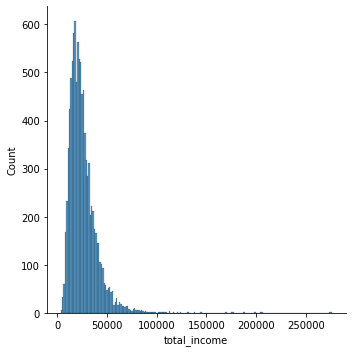

In [117]:
sns.displot(df_not_null[df_not_null['income_type'] == 'employee']['total_income']) #menampilkan grafik sebaran data ttoal income berdasarkan nilai pada kolom income_type

Based on the calculation of the average and median of the two column factors `dob_years_group` and `income_type`, various values are obtained. Because the number of data groups in the two columns varies and the graph of the distribution of `total_income` data against the `income_type` column is skewed, the median of the `income_type` column will be taken to replace the missing values.

In [82]:
business_median = 27577.2720
civil_servant_median = 24071.6695
employee_median = 79866.1030
entrepreneur_median = 79866.1030
maternity_leave_median = 8612.6610
retiree_median = 18962.3180
student_median = 15712.2600
unemployed_median = 21014.3605

# membuat fungsi untuk mengganti nilai yang hilang berdasarkan kategori jenis pendapatan
def income(x):
    income_type = x['income_type']
    total_income = x['total_income']
    if (income_type == 'business') & (total_income == -1):
        return business_median
    elif (income_type == 'civil_servant') & (total_income == -1):
        return civil_servant_median
    elif (income_type == 'entrepreneur') & (total_income == -1):
        return entrepreneur_median
    elif (income_type == 'employee') & (total_income == -1):
        return employee_median
    elif (income_type == 'maternity leave') & (total_income == -1):
        return maternity_leave_median
    elif (income_type == 'retiree') & (total_income == -1):
        return retiree_median
    elif (income_type == 'student') & (total_income == -1):
        return student_median
    elif (income_type == 'unemployed') & (total_income == -1):
        return unemployed_median
    else : 
        return total_income

In [83]:
df['total_income'] = df[['income_type', 'total_income']].fillna(-1).apply(income, axis=1)#menjalankan fungsi dan menyimpanya kedalam kolom total_income

/tmp/ipykernel_27/2978719233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_income'] = df[['income_type', 'total_income']].fillna(-1).apply(income, axis=1)#menjalankan fungsi dan menyimpanya kedalam kolom total_income


In [84]:
# Memeriksa bagaimana nilai di dalam kolom baru
df.head()

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_group
0,0,1,-8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,1,-4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,2,0,-5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,3,-4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult


In [85]:
# Periksa jumlah entri di kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21453 non-null  int64  
 1   children          21453 non-null  int64  
 2   days_employed     19351 non-null  float64
 3   dob_years         21453 non-null  float64
 4   education         21453 non-null  object 
 5   education_id      21453 non-null  int64  
 6   family_status     21453 non-null  object 
 7   family_status_id  21453 non-null  int64  
 8   gender            21453 non-null  object 
 9   income_type       21453 non-null  object 
 10  debt              21453 non-null  int64  
 11  total_income      21453 non-null  float64
 12  purpose           21453 non-null  object 
 13  dob_years_group   21453 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ MB


The number of non-null values in the `total_income` column is the same as the other columns, which indicates that the function to replace missing data is working properly.

Next, missing values will be corrected in the `days_employed` column.

###  Fixed values in `days_employed`

To correct missing values in the `days_employed` column, it will look at the factors from the `income_type` column.

In [86]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
median_days_based_type = df_not_null.pivot_table(index='income_type', values = 'days_employed', aggfunc='median') #menghitung rata-rata pendapatan nasabah berdasarkan kelompok usia
median_days_based_type

,days_employed
income_type,
business,-1547.382223
civil servant,-2689.368353
employee,-1574.202821
entrepreneur,-520.848083
paternity / maternity leave,-3296.759962
retiree,365213.306266
student,-578.751554
unemployed,366413.652744


In [87]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
median_days_based_type = df.pivot_table(index='income_type', values = 'days_employed', aggfunc='mean') #menghitung rata-rata pendapatan nasabah berdasarkan kelompok usia
median_days_based_type

,days_employed
income_type,
business,-2111.524398
civil servant,-3399.896902
employee,-2326.499216
entrepreneur,-520.848083
paternity / maternity leave,-3296.759962
retiree,365003.491245
student,-578.751554
unemployed,366413.652744


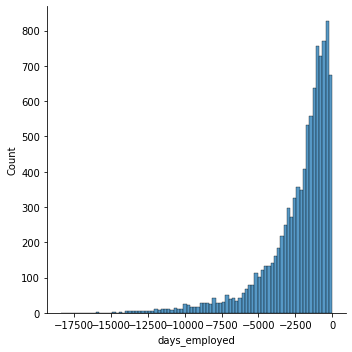

In [88]:
sns.displot(df_not_null[df_not_null['income_type'] == 'employee']['days_employed'])

Based on the calculation of the average and median of the `income_type` column factors, various values are obtained. Because the number of data groups in the two columns varies and the graph of the distribution of `days_employed` data in the `income_type` column is skewed, the median of each group in the `income_type` column will be taken to replace the missing values in the `days_employed` column.

In [89]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi
business_median = -2111.524398
civil_servant_median = -3399.896902
employee_median = -2326.499216
entrepreneur_median = -520.848083
maternity_leave_median = -3296.759962
retiree_median = 365003.491245
student_median = 578.751554
unemployed_median = 366413.652744

# membuat fungsi untuk mengganti nilai yang hilang berdasarkan kategori jenis pendapatan
def income(x):
    income_type = x['income_type']
    days_employed = x['days_employed']
    if (income_type == 'business') & (days_employed == -1):
        return business_median
    elif (income_type == 'civil_servant') & (days_employed == -1):
        return civil_servant_median
    elif (income_type == 'entrepreneur') & (days_employed == -1):
        return entrepreneur_median
    elif (income_type == 'employee') & (days_employed == -1):
        return employee_median
    elif (income_type == 'maternity leave') & (days_employed == -1):
        return maternity_leave_median
    elif (income_type == 'retiree') & (days_employed == -1):
        return retiree_median
    elif (income_type == 'student') & (days_employed == -1):
        return student_median
    elif (income_type == 'unemployed') & (days_employed == -1):
        return unemployed_median
    else : 
        return days_employed

In [90]:
# Terapkan fungsi ke income_type untuk mengganti nilai yang hilang
df['days_employed'] = df[['income_type', 'days_employed']].fillna(-1).apply(income, axis=1)#menjalankan fungsi dan menyimpanya kedalam kolom days_employed


/tmp/ipykernel_27/885800917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_employed'] = df[['income_type', 'days_employed']].fillna(-1).apply(income, axis=1)#menjalankan fungsi dan menyimpanya kedalam kolom days_employed


In [91]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21453 non-null  int64  
 1   children          21453 non-null  int64  
 2   days_employed     21453 non-null  float64
 3   dob_years         21453 non-null  float64
 4   education         21453 non-null  object 
 5   education_id      21453 non-null  int64  
 6   family_status     21453 non-null  object 
 7   family_status_id  21453 non-null  int64  
 8   gender            21453 non-null  object 
 9   income_type       21453 non-null  object 
 10  debt              21453 non-null  int64  
 11  total_income      21453 non-null  float64
 12  purpose           21453 non-null  object 
 13  dob_years_group   21453 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ MB


The number of non-null values in the `total_income` column is the same as the other columns, which indicates that the function to replace missing data is working properly.

## Data Categorization

Based on the hypotheses to be tested, the data will first be grouped into the columns `children`, `family_status`, `total_income` and `purpose` to make it easier for us to check these hypotheses.

In [104]:
df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_group,childs
0,0,1,-8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult,with_child
1,1,1,-4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult,with_child
2,2,0,-5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult,no_child
3,3,3,-4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult,with_child
4,4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult,no_child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,21520,1,-4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,adult,with_child
21449,21521,0,343937.404131,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,retired,no_child
21450,21522,1,-2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,adult,with_child
21451,21523,3,-3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,adult,with_child


In [105]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
df['children']

0        1
1        1
2        0
3        3
4        0
        ..
21448    1
21449    0
21450    1
21451    3
21452    2
Name: children, Length: 21453, dtype: int64

In [119]:
# Periksa nilai unik
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

Based on the data content in the `children` column, it will be grouped based on customers with more than 1 child and without children.

In [108]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def child (x):
    if x == 0:
        return 'no_child'
    return 'with_child'

In [120]:
# Buat kolom yang memuat kategori dan hitung nilainya
df['childs'] = df['children'].apply(child)
df['childs'].value_counts() # Hitung setiap nilai kategori untuk melihat pendistribusiannya

/tmp/ipykernel_27/496581620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['childs'] = df['children'].apply(child)


no_child      14090
with_child     7363
Name: childs, dtype: int64

Based on the grouping of customers based on the number of children, it is known that the number of customers without children is greater than the number of customers who have at least one child. Next, the data will be categorized in the `family_status` column with the help of the *dictionary* that was previously created.

In [167]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
df['family_status_id']

0        0
1        0
2        0
3        0
4        1
        ..
21448    1
21449    0
21450    1
21451    0
21452    0
Name: family_status_id, Length: 21453, dtype: int64

In [168]:
# menampmilkan dicitonary
dic_family_status_id

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

In [126]:
# membuat fungsi untuk mengkategorikan data berdasarkan status perkawinan 
def partner_status (y):
    if y  < 3 :
        return 'taken'
    return 'single'

In [129]:
df['partner_status'] = df['family_status_id'].apply(partner_status)# membuat kolom yang memuat kelompok data family_status
df['partner_status'].value_counts() # Hitung setiap nilai kategori untuk melihat pendistribusiannya

/tmp/ipykernel_27/3386130406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['partner_status'] = df['family_status_id'].apply(partner_status)


taken     17448
single     4005
Name: partner_status, dtype: int64

Based on the grouping of customers based on partner status, it is known that the number of customers in couples is greater than that of those who are single (without partners). Next, the data will be grouped in the total_income column based on the percentage or quarter of the data.

In [131]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian
df['total_income']

0        40620.102
1        17932.802
2        23341.752
3        42820.568
4        25378.572
           ...    
21448    35966.698
21449    24959.969
21450    14347.610
21451    39054.888
21452    13127.587
Name: total_income, Length: 21453, dtype: float64

In [147]:
# Dapatkan kesimpulan statistik untuk kolomnya
df['total_income'].describe()

count     21453.000000
mean      29294.195727
std       19500.027607
min        3306.762000
25%       17219.352000
50%       24067.224000
75%       34330.531000
max      362496.645000
Name: total_income, dtype: float64

From the statistical conclusions above, data grouping will be based on data percentages, where income below 25% of total_income will be categorized as `low' income, 25% - 50% as `medium', 50% -75% as `high', and above 75% with `very_high` so that data grouping is more varied.

In [149]:
total_income_std = df['total_income'].mean()
total_income_std

19500.02760732359

In [158]:
total_income_25 = 17219.352000
total_income_50 = 24067.224000
total_income_75 = 34330.531000

# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def income_rate (z):
 
    if z < total_income_25:
        return 'low'
    if z < total_income_50:
        return 'medium'
    if z < total_income_75:
        return 'high'
    return 'very_high' 

In [160]:
# Buat kolom yang memuat kategori
df['income_rate'] = df['total_income'].apply(income_rate)# membuat kolom yang memuat kelompok data family_status

/tmp/ipykernel_27/2556587340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_rate'] = df['total_income'].apply(income_rate)# membuat kolom yang memuat kelompok data family_status


In [162]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
df['income_rate'].value_counts()

high         5508
very_high    5364
low          5363
medium       5218
Name: income_rate, dtype: int64

Selanjutnya akan dilakukan pengkategorian data berdasarkan kolom purpose.

In [170]:
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [181]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok purpose
def purpose_group(a):
    if 'car' in a:
        return 'vehicle'
    elif ('edu' in a) or ('uni' in a):
        return 'education'
    elif ('pro'in a) or ('hou' in a) or ('est' in a):
        return 'property'
    elif ('wed' in a):
        return 'wedding'

In [183]:
# Buat kolom yang memuat kategori
df['purpose_group'] = df['purpose'].apply(purpose_group)# membuat kolom yang memuat kelompok data purpose

/tmp/ipykernel_27/2250430320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purpose_group'] = df['purpose'].apply(purpose_group)# membuat kolom yang memuat kelompok data purpose


In [185]:
df['purpose_group'].value_counts()

property     10811
vehicle       4306
education     4013
wedding       2323
Name: purpose_group, dtype: int64

## Checking hypothesis


**Is there any correlation between having children and the probability of defaulting on a loan?**

In [190]:
# Periksa data anak dan data gagal bayar pinjaman
data_pivot_1 = df.groupby('childs')['debt'].sum()
print(data_pivot_1.head()) 

# Hitung persentase gagal bayar berdasarkan jumlah anak
df[['childs', 'debt']].groupby('childs').mean()*100

childs
no_child      1063
with_child     678
Name: debt, dtype: int64


,debt
childs,
no_child,7.544358
with_child,9.208203


**Conclusion**

From the data above, a correlation is obtained between customers who have children and the probability of loan default, where customers who have children tend to or more often default on loans than customers who do not have children. This is likely to happen because customers who have children have a higher priority in allocating the income they earn to their family and children.

**Is there a correlation between family status and the probability of defaulting on a loan?**

In [189]:
# Periksa data status keluarga dan data gagal bayar pinjaman
data_pivot_2 = df.groupby('partner_status')['debt'].sum()
print(data_pivot_2.head()) 

# Hitung persentase gagal bayar berdasarkan status keluarga
df[['partner_status', 'debt']].groupby('partner_status').mean()*100


partner_status
single     359
taken     1382
Name: debt, dtype: int64


,debt
partner_status,
single,8.963795
taken,7.920679


**Conclusion**

From the data above, a correlation is obtained between the customer's family status and the probability of loan default, where single customers are more likely to default on the loan. This is likely to happen because their income is prioritized for savings for preparation for marriage or buying a new house when they start a family.

**Apakah terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman?**

In [191]:
# Periksa data tingkat pendapatan dan data gagal bayar pinjaman
data_pivot_3 = df.groupby('income_rate')['debt'].sum()
print(data_pivot_1.head()) 


# Hitung persentase gagal bayar berdasarkan tingkat pendapatan
df[['income_rate', 'debt']].groupby('income_rate').mean()*100


childs
no_child      1063
with_child     678
Name: debt, dtype: int64


,debt
income_rate,
high,8.315178
low,7.961962
medium,8.777309
very_high,7.419836


**Conclusion**

From the data above, a correlation is obtained between the customer's income level and the probability of loan default, where customers with a high or lower income level tend to default on the loan. This is likely to happen because the income they earn is only enough for their daily needs, so they have the potential to be late or default on their loan payments.

**How do credit goals affect the default percentage?**

In [192]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
df[['purpose_group', 'debt']].groupby('purpose_group').mean()*100


,debt
purpose_group,
education,9.220035
property,7.233373
vehicle,9.359034
wedding,8.006888


**Conclusion**

From the data above, a correlation is obtained where the purpose of borrowing for study purposes and purchasing a vehicle tend to be loan defaults. This is likely to happen because these two goals are the primary and secondary needs of almost all customers in carrying out their daily activities, regardless of their income level.

# General Conclusion

The data obtained is bank customer credit_scoring data. The data contains 12 columns and 21525 rows. There are several problems found in the data frame, namely:
1. There are 2174 (10%) missing data points in the `dob_years` and `total_income` columns.
2. There are formatting and spelling problems in the `children`, `days_employed`, and `education` columns.
3. There are 72 data duplications.

Then these problems are handled by correcting spelling and formatting data with the help of .replace(). Duplicate removal is done using the .drop_duplicates() method. For missing data in the 'dob_years' and 'total_income' columns, replace the null values with the median of each group of data in each column value. The median value is chosen based on graphic trend analysis, which shows a skewed data distribution.
After the data frame has been repaired from the problems above, the data is grouped to make it easier for us to test the hypotheses. The data that is grouped is in the `children`, `family_status`, `total_income`, and `purpose` columns.

Based on hypothesis testing, it is known that there is a correlation where:
1. Customers who have children have a higher probability of defaulting on loans, whereas customers who have children tend to default more often on loans than customers who do not have children.
2. Single customers are more likely to default on loans.
3. Customers whose income level is high or lower tend to default on loans.
4. The purpose of the loan is for study purposes and purchasing a vehicle, which tends to result in default on the loan.